In [1]:
# this notebook is a walkthrough on how to build collective variables using Supervised machine learning algorithms


# The general idea is to use the algorithm's decision function or the distance to an its decision boundary as the collective variable 


### The method is super generic, and only requires sampling in the start and end state to be able to build a classifier algorithm which we can then use to sample transitions between the state

In [290]:
# some imports 
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_context("poster",1.3)
from msmbuilder.utils import load

Populating the interactive namespace from numpy and matplotlib


/Users/muneeb/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## These are the 3 ns alanine training features

In [291]:
import mdtraj as md 

In [292]:
from msmbuilder.featurizer import DihedralFeaturizer

In [293]:
t1 = md.load("../SML_CV/alanine_example/svm_meta_traj_mc/train_traj.xtc",
            top="../SML_CV/alanine_example/svm_meta_traj_mc/train_traj_top.pdb")

In [294]:
plot_feat = DihedralFeaturizer(sincos=False).transform([t1])[0]


In [295]:
# beta basin
basin_1_inds = np.where(np.logical_and(plot_feat[:,0]<0,plot_feat[:,1]>2))[0][:100]
# alpha_r basin
basin_2_inds = np.where(np.logical_and(plot_feat[:,0]<0,\
                                       np.logical_and(plot_feat[:,1]<1,plot_feat[:,1]>-1)))[0][:100]
#alpha_l
basin_3_inds = np.where(np.logical_and(plot_feat[:,0]>0,\
                                       np.logical_and(plot_feat[:,1]<2,plot_feat[:,1]>-1)))[0][:100]

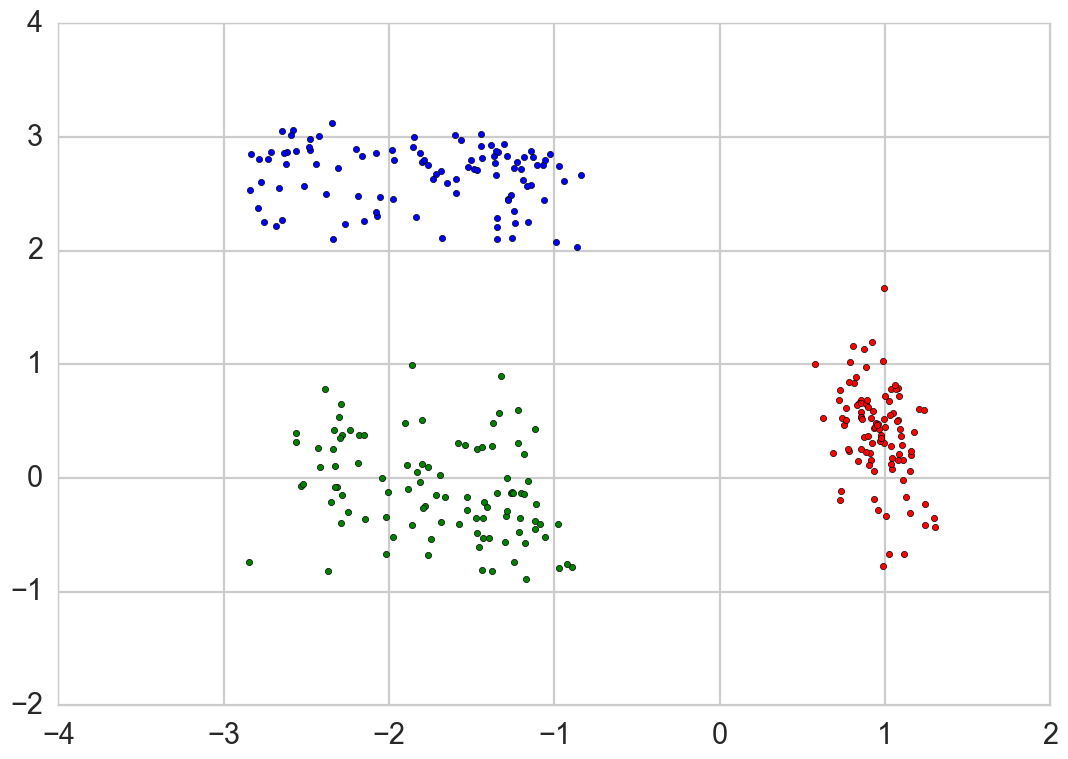

In [296]:
# scatter(plot_feat[:,0],plot_feat[:,1],alpha=0.3)
for v,i in enumerate([basin_1_inds,basin_2_inds,basin_3_inds]):
    scatter(plot_feat[i,0],plot_feat[i,1],c=sns.color_palette()[v])

In [297]:
train_traj = t1[basin_1_inds] +t1[basin_2_inds] +t1[basin_3_inds]

In [298]:
train_feat = DihedralFeaturizer().transform([train_traj])[0] 
plot_feat=DihedralFeaturizer(sincos=False).transform([train_traj])[0]

In [301]:
import pandas as pd

In [302]:
df = pd.DataFrame(DihedralFeaturizer().describe_features(train_traj))

In [303]:
# The pandas data frame tells us what the features are that we are using
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[4, 6, 8, 14]",phi,Dihedral,sin,"[0, 1]","[ALA, ACE]","[1, 2]"
1,"[4, 6, 8, 14]",phi,Dihedral,cos,"[0, 1]","[ALA, ACE]","[1, 2]"
2,"[6, 8, 14, 16]",psi,Dihedral,sin,"[1, 2]","[ALA, NME]","[2, 3]"
3,"[6, 8, 14, 16]",psi,Dihedral,cos,"[1, 2]","[ALA, NME]","[2, 3]"


# we can either train a new model or use the one that is provided

In [57]:
from sklearn.svm import LinearSVC,SVC
import os

In [58]:
if not os.path.isfile("./svm_model_3.pkl"):
    clf = svc = LinearSVC(penalty="l1",C=1,dual=False)
    train =True 
else:
    clf = load("./svm_model_3.pkl")
    train =False

In [59]:
print(clf)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)


In [63]:
plot_feat.shape

(300, 2)

In [64]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

y=np.concatenate([np.zeros(100),np.ones(100),np.ones(100)+1])

if train:
    clf.fit(train_X,y)

In [67]:
nx =ny=50
lim_x = lim_y = np.linspace(-pi,pi,nx)
xv, yv = np.meshgrid(lim_x, lim_y, sparse=False, indexing='ij')
res = []
for i in range(nx):
    for j in range(ny):
        X_val = np.array([np.sin(xv[i,j]),np.cos(xv[i,j]), np.sin(yv[i,j]), np.cos(yv[i,j])]).reshape(1,-1)
        res.extend(clf.predict(X_val))
#contourf(lim_x,lim_y,np.array(res).reshape(10,10),cmap='coolwarm')


In [83]:
np.argmax(clf.decision_function(train_X),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


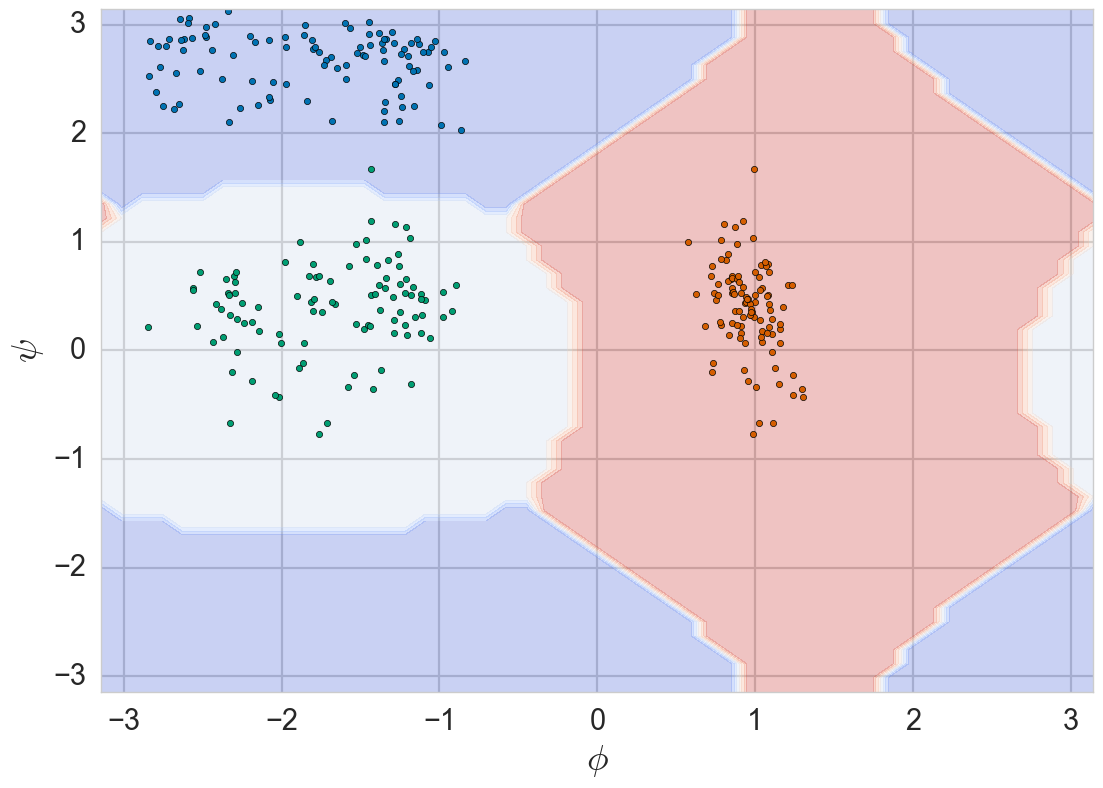

In [205]:
contourf(lim_x,lim_y,np.array(res).reshape(nx,ny).T,cmap="coolwarm",alpha=0.3)
p=scatter(np.vstack(plot_feat)[:100,0],np.vstack(plot_feat)[:100,1],
       c=sns.color_palette("colorblind")[0])
p=scatter(np.vstack(plot_feat)[100:200,0],np.vstack(plot_feat)[200:300,1],
       c=sns.color_palette("colorblind")[1])
p=scatter(np.vstack(plot_feat)[200:,0],np.vstack(plot_feat)[200:,1],
       c=sns.color_palette("colorblind")[2])
xlim([-pi,pi])
ylim([-pi,pi])
# cb=colorbar(p)
#cb.set_label(r'$SVM_{cv}$')
ylabel(r'$\psi$',size=26)
xlabel(r'$\phi$',size=26)

In [111]:
clf.decision_function?

In [85]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./svm_model_3.pkl")

In [89]:
b=clf.decision_function(train_X)

# Lets take a look at the feature coefficients as infered by the model

In [159]:
label_list=[r'$\beta$ vs rest',r'$\alpha_R$ vs rest',r'$\alpha_L$ vs rest']

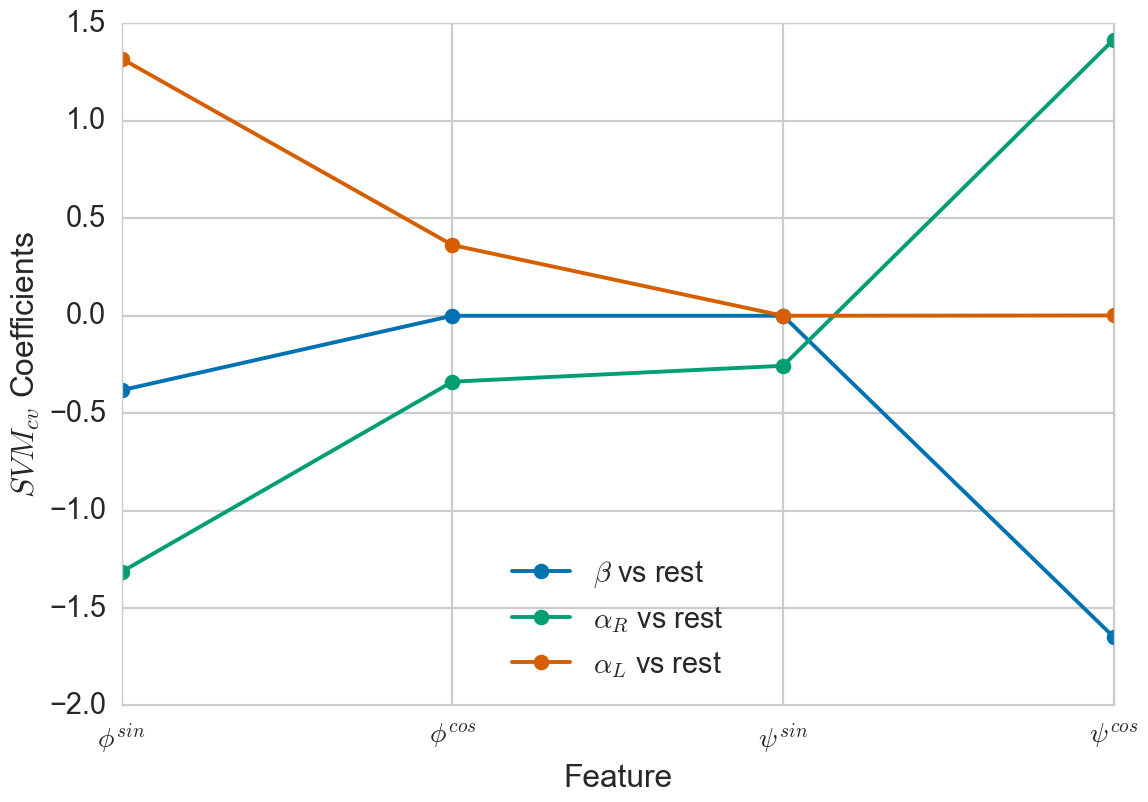

In [161]:
plot([0,1,2,3],clf.coef_[0],color=sns.color_palette("colorblind")[0],marker='o',
    label=label_list[0])

plot([0,1,2,3],clf.coef_[1],color=sns.color_palette("colorblind")[1],marker='o',label=label_list[1])
plot([0,1,2,3],clf.coef_[2],color=sns.color_palette("colorblind")[2],marker='o',label=label_list[2])
xticks([0,1,2,3],[r'$\phi^{sin}$',r'$\phi^{cos}$',r'$\psi^{sin}$',r'$\psi^{cos}$'],size=20)
xlabel("Feature")
ylabel(r'$SVM_{cv}$ Coefficients')
legend(loc='best')


# To sample the SVM's decision boundary repeatedly we need Plumed, OpenMM and the tica_metadynamics from github

In [97]:
from sklearn.utils.validation import check_is_fitted

In [98]:
# These imports are designed to interface between msmbuilder and Plumed
from tica_metadynamics.pyplumed import render_df
from tica_metadynamics.pyplumed import render_meta 
from jinja2 import Template

In [99]:
plumed_matheval_template = Template("MATHEVAL ARG={{arg}} FUNC={{func}} LABEL={{label}} PERIODIC={{periodic}} ")

plumed_combine_template = Template("COMBINE LABEL={{label}} ARG={{arg}} COEFFICIENTS={{coefficients}} "+\
                                    "PERIODIC={{periodic}} ")

# The function below will teach Plumed how to compute a distance to an SVM model's decision boundary.

### This is not necessary for most classifiers that ouput probabilities since we can directly use the probabilities as the collective variable in that instance. However, the output of SVM's is an indicator function defined using the signed distance to the decision boundary so we use that instead

In [104]:
clf.classes_

array([ 0.,  1.,  2.])

In [115]:
def render_svm(clf=None, input_prefix="f0", output_prefix="l"):
    if clf is None or check_is_fitted(clf,attributes=["coef_","intercept_"]):
        raise ValueError("Need a fitted Sklearn SVM object")
    else:
        n_args = clf.coef_.shape[1]
        output = []
        arg_list=",".join(["%s_%d"%(input_prefix,i) for i in range(n_args)])
        if clf.classes_.shape[0] ==2 :
            coeff = ",".join([str(i) for i in clf.coef_[0]])
            w_norm = np.linalg.norm(clf.coef_)

            output.append(plumed_combine_template.render(label="%s_0"%output_prefix,
                                          arg=arg_list,
                                          coefficients=coeff,
                                          periodic="NO")+"\n")

            func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))

            output.append(plumed_matheval_template.render(label="%s_1"%output_prefix,
                                          arg="l_0",
                                          func=func,
                                          periodic="NO")+"\n")
        else:
            for index,l_out in enumerate(clf.classes_):
                coeff = ",".join([str(i) for i in clf.coef_[index]])
                w_norm = np.linalg.norm(clf.coef_[index])

                output.append(plumed_combine_template.render(label="%s_%d0"%(output_prefix,l_out),
                                              arg=arg_list,
                                              coefficients=coeff,
                                              periodic="NO")+"\n")

                func="(x+%s)/%s"%(str(clf.intercept_[index]),str(w_norm))

                output.append(plumed_matheval_template.render(label="%s_%d1"%(output_prefix,l_out),
                                              arg="l_%d0"%l_out,
                                              func=func,
                                              periodic="NO")+"\n")
        
    return ''.join(output)
        
        

In [118]:
total_out=[]
total_out.extend("RESTART\n")
total_out.extend(render_df(df))
total_out.extend(render_svm(clf))
#total_out.extend(render_meta.render_metad_code("l_1",biasfactor=8,sigma=0.1))
#total_out.extend(render_meta.render_metad_bias_print("l_1,metad.bias"))

In [119]:
print("".join(total_out))

RESTART
TORSION ATOMS=5,7,9,15 LABEL=phi_0_1 

TORSION ATOMS=7,9,15,17 LABEL=psi_1_2 

MATHEVAL ARG=phi_0_1 FUNC=sin(x) LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=phi_0_1 FUNC=cos(x) LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=psi_1_2 FUNC=sin(x) LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=psi_1_2 FUNC=cos(x) LABEL=f0_3 PERIODIC=NO 

COMBINE LABEL=l_00 ARG=f0_0,f0_1,f0_2,f0_3 COEFFICIENTS=-0.38178737855,0.0,0.0,-1.64909610071 PERIODIC=NO 
MATHEVAL ARG=l_00 FUNC=(x+-0.231006956534)/1.69271366503 LABEL=l_01 PERIODIC=NO 
COMBINE LABEL=l_10 ARG=f0_0,f0_1,f0_2,f0_3 COEFFICIENTS=-1.31373874466,-0.338381698177,-0.256674165536,1.4176064148 PERIODIC=NO 
MATHEVAL ARG=l_10 FUNC=(x+-1.12480383751)/1.97886362275 LABEL=l_11 PERIODIC=NO 
COMBINE LABEL=l_20 ARG=f0_0,f0_1,f0_2,f0_3 COEFFICIENTS=1.31899840071,0.362757783935,0.0,0.00163893035001 PERIODIC=NO 
MATHEVAL ARG=l_20 FUNC=(x+-0.150042685865)/1.3679739314 LABEL=l_21 PERIODIC=NO 



# In the text above, l_01, l_11, and l_21 are the 3 CVs that correspond to the 3 dimensions for metadynamics 

In [36]:
# Run the metadynamics on a GPU

In [12]:
import mdtraj as md
from msmbuilder.featurizer import DihedralFeaturizer

In [184]:
test_traj = md.load("./svm_meta_traj_mc/reweight//trajectory.dcd",top="./0.pdb")
feat = load("./train_data//featurizer.pkl")
bias = np.loadtxt("./svm_meta_traj_mc/reweight//BIAS")

In [185]:
test_traj

<mdtraj.Trajectory with 1219 frames, 22 atoms, 3 residues, and unitcells at 0x1103acb38>

In [186]:
test_feat = feat.transform([test_traj])[0]
plot_test_feat = DihedralFeaturizer(sincos=False).transform([test_traj])[0]

In [187]:
clf_out =clf.decision_function(test_feat)/np.linalg.norm(clf.coef_,axis=1)

# Making sure that Sklearn and Plumed are computing the same value

In [188]:
clf

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

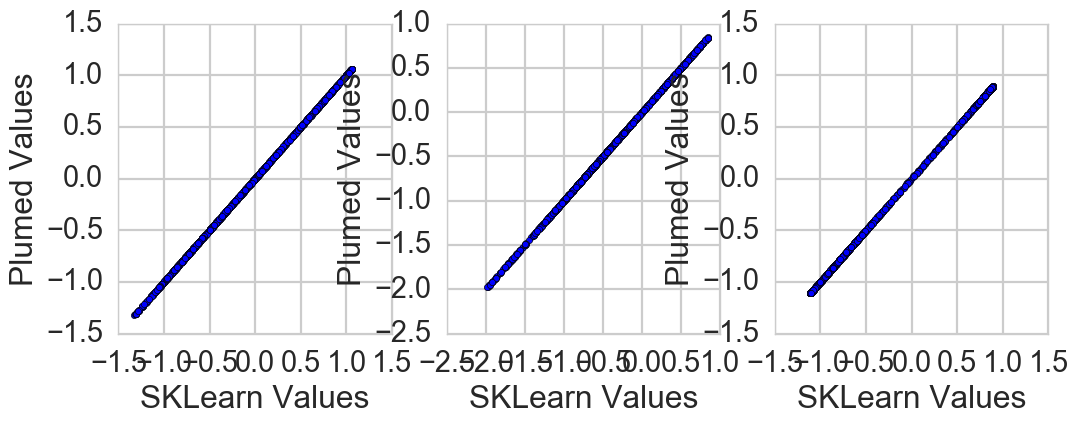

In [189]:
figure(figsize=(12,4))
for i in range(3):
    subplot(1,3,i+1)
    scatter(clf_out[:,i],bias[:,i+1])
    xlabel("SKLearn Values")
    ylabel("Plumed Values")

# We can analyze this in terms of plotting the trajectories

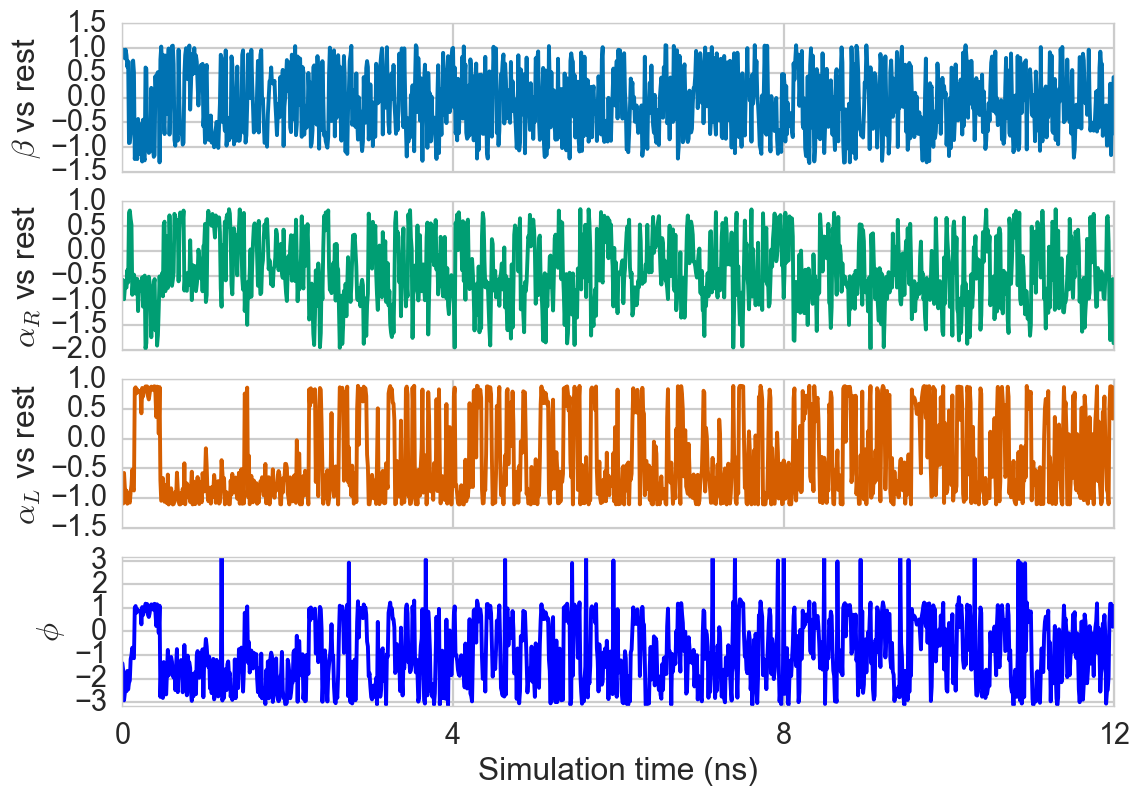

In [196]:
subplot(4,1,1)
plot(bias[:1200,1],c=sns.color_palette("colorblind")[0])
xticks([0,400,800,1200],[])
ylabel(label_list[0])

subplot(4,1,2)
plot(bias[:1200,2],c=sns.color_palette("colorblind")[1])
xticks([0,400,800,1200],[])
ylabel(label_list[1])


subplot(4,1,3)
plot(bias[:1200,3],c=sns.color_palette("colorblind")[2])
xticks([0,400,800,1200],[])
ylabel(label_list[2])

subplot(4,1,4)
plot(plot_test_feat[:1200,0])
xticks([0,400,800,1200],[0,4,8,12])
xlabel("Simulation time (ns)")
ylim([-pi,pi])
ylabel(r'$\phi$')

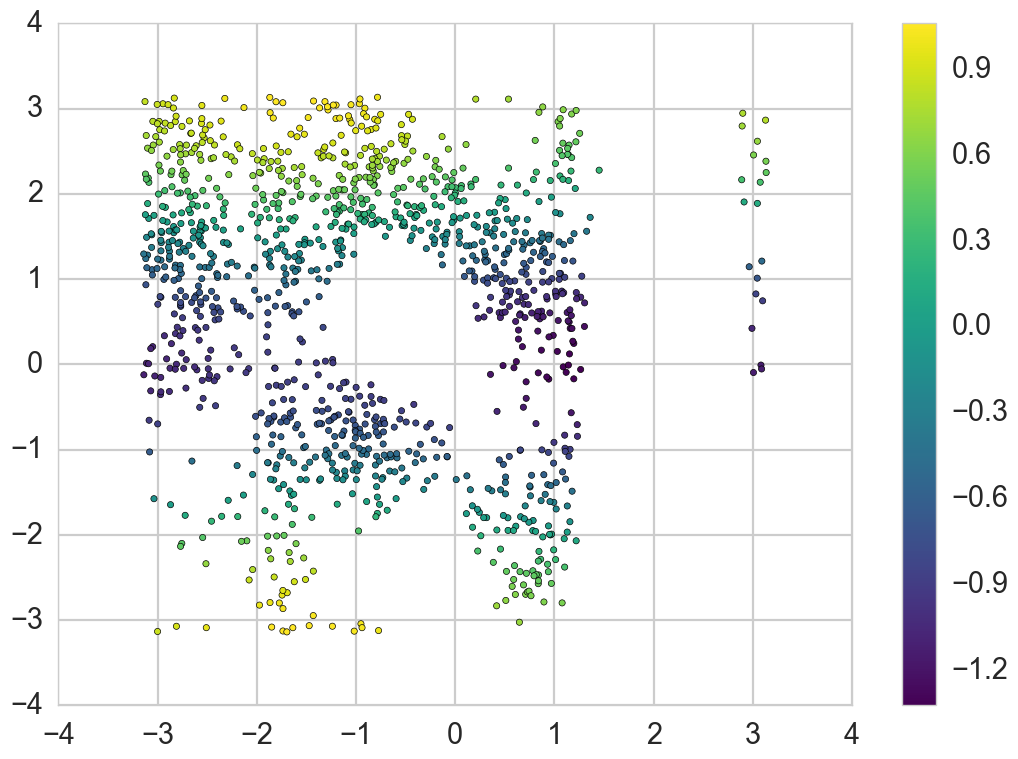

In [191]:
scatter(plot_test_feat[:,0],plot_test_feat[:,1],c=clf_out[:,0],cmap='viridis')
colorbar()

# Or re-weighting using last-bias reweight 

/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


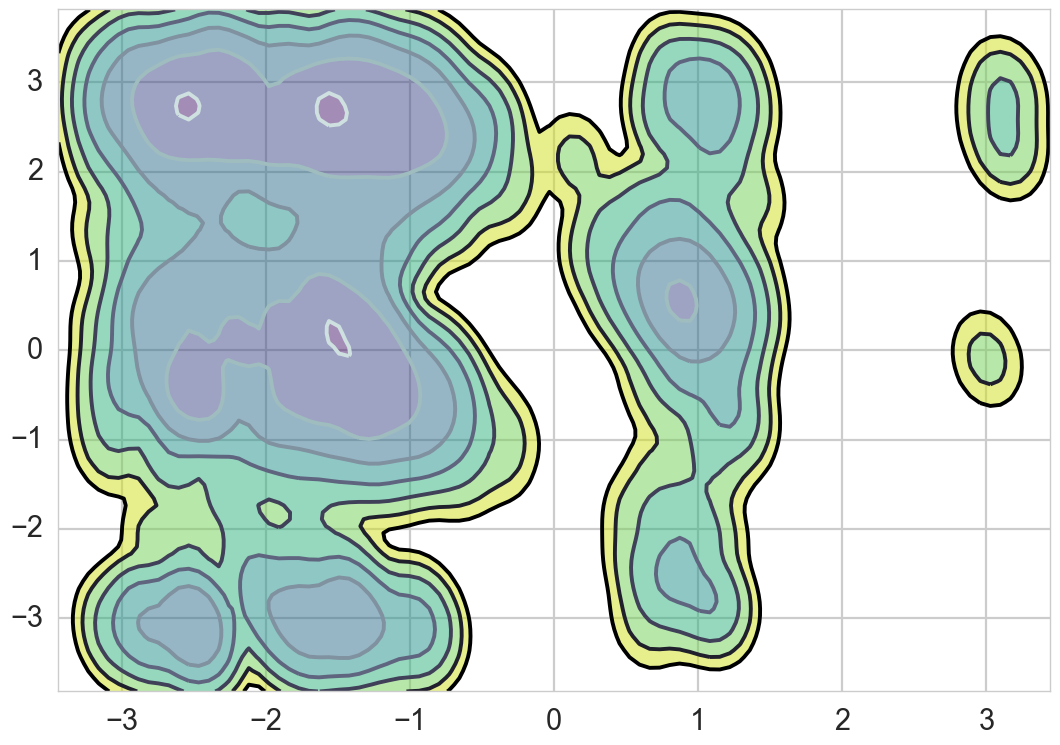

In [192]:
ax,data=msme.plot_free_energy(plot_test_feat,obs=[0,1],n_samples=100000,pi=np.exp(bias[:,-1]/2.49),
                      cmap='viridis',gridsize=100,vmin=-1,vmax=7,n_levels=8,return_data=True)

/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


(-3.141592653589793, 3.141592653589793)

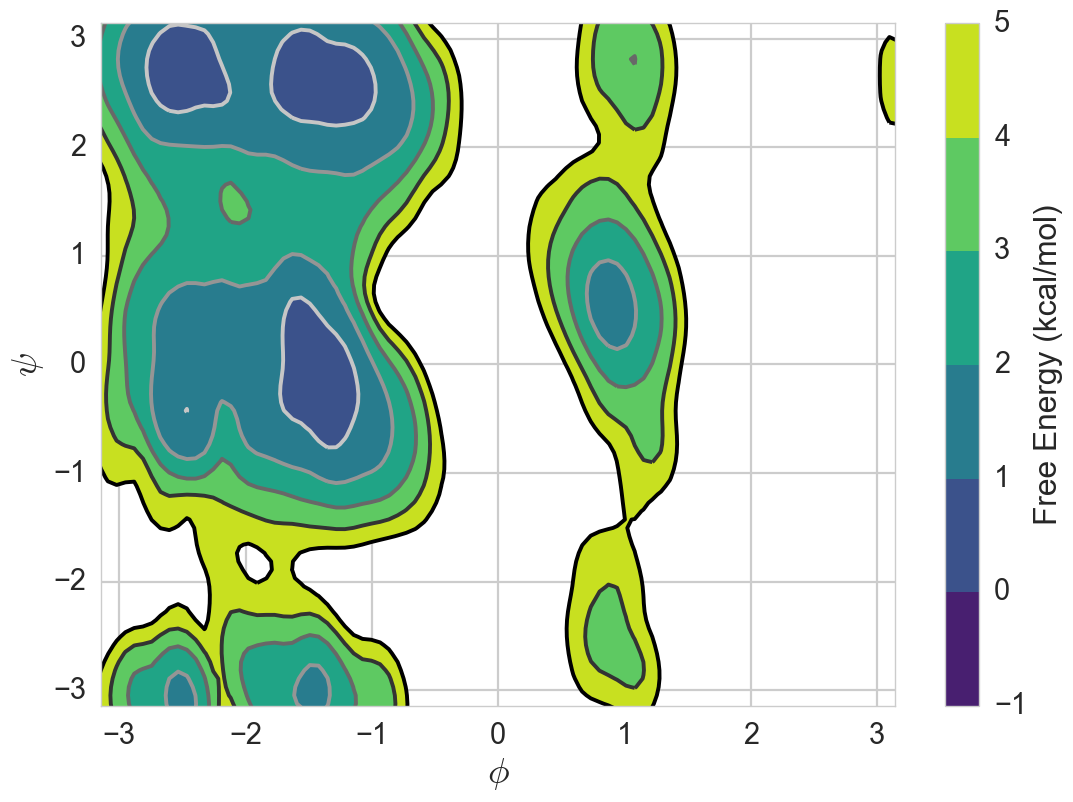

In [193]:
offset = data[2].min(0)
contour(data[0],data[1],data[2],levels=np.linspace(-1,5,7))
p=contourf(data[0],data[1],data[2],levels=np.linspace(-1,5,7),cmap='viridis')
cb=colorbar(p)
cb.set_label("Free Energy (kcal/mol)")
xlabel(r'$\phi$',size=26)
ylabel(r'$\psi$',size=26)
xlim([-pi,pi])
ylim([-pi,pi])


In [273]:
%matplotlib nbagg
import matplotlib.animation as animation

In [260]:
%matplotlib inline

In [276]:
label_list=[r'$\beta$',r'$\alpha_R$',r'$\alpha_L$']

In [279]:
sns.set_context("paper")

<IPython.core.display.Javascript object>


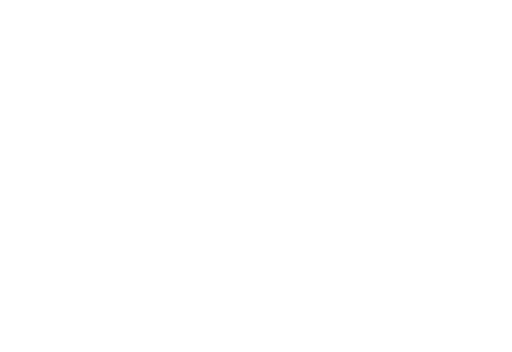

/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/muneeb/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


1200
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275

<IPython.core.display.Javascript object>


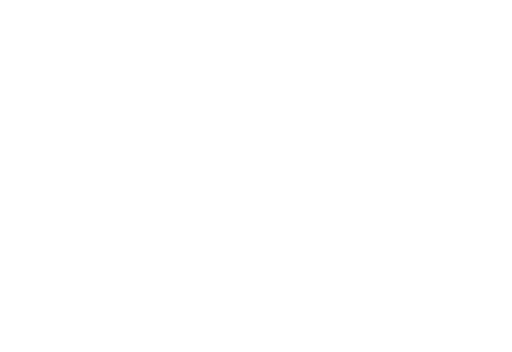

In [283]:
all_tic_0 = np.arange(1200)

f0 = figure()#, dpi = 100)
ax01 = plt.subplot2grid((3, 4), (0, 0),colspan=2)
p01, = ax01.plot(bias[:1200,1],c=sns.color_palette("colorblind")[0],alpha=0.1)
p01, = ax01.plot(all_tic_0,bias[:1200,1],c=sns.color_palette("colorblind")[0])
ax01.set_xticks([0,400,800,1200],)
ax01.set_xticklabels([])
ax01.set_ylabel(label_list[0])


ax02 = plt.subplot2grid((3, 4), (1, 0),colspan=2)
p02, = ax02.plot(bias[:1200,2],c=sns.color_palette("colorblind")[1],alpha=0.1)
p02, = ax02.plot(all_tic_0,bias[:1200,2],c=sns.color_palette("colorblind")[1])
ax02.set_xticks([0,400,800,1200],)
ax02.set_xticklabels([])
ax02.set_ylabel(label_list[1])


ax03 = plt.subplot2grid((3, 4), (2, 0),colspan=2)
p03, = ax03.plot(bias[:1200,2],c=sns.color_palette("colorblind")[2],alpha=0.1)
p03, = ax03.plot(all_tic_0,bias[:1200,2],c=sns.color_palette("colorblind")[2])
ax03.set_xticks([0,400,800,1200],)
ax03.set_xticklabels([0,4,8,12])
ax03.set_ylabel(label_list[2])
ax03.set_xlabel("Simulation Time (ns)")



ax04 = plt.subplot2grid((3, 4), (1, 2),rowspan=2,colspan=2)
ax04.contourf(lim_x,lim_y,np.array(res).reshape(nx,ny).T,cmap="coolwarm",alpha=0.3)
p04,=ax04.plot(plot_test_feat[0,0],plot_test_feat[0,1])
ax04.set_xlabel(r'$\phi$')
ax04.set_ylabel(r'$\psi$')
ax04.set_ylim([-pi,pi])
ax04.set_xlim([-pi,pi])




def updateData(i):
    print(i)

    frm_pt = max(0, i-10)
    p01.set_data(all_tic_0[frm_pt:i], bias[frm_pt:i,1])
    p01.set_color(sns.color_palette("colorblind")[0])
    
    p02.set_data(all_tic_0[frm_pt:i], bias[frm_pt:i,2])#,c=sns.color_palette("colorblind")[1])
    p02.set_color(sns.color_palette("colorblind")[1])

    p03.set_data(all_tic_0[frm_pt:i], bias[frm_pt:i,3])#c=sns.color_palette("colorblind")[2])
    p03.set_color(sns.color_palette("colorblind")[2])

    p04.set_data(plot_test_feat[frm_pt:i,0], plot_test_feat[frm_pt:i,1])
    p04.set_color(sns.color_palette("colorblind")[4])
    p04.set_marker("o")

    return p01,p02,p03,p04

print(len(all_tic_0))
# f0.tight_layout()
f0.show()
simulation = animation.FuncAnimation(f0, updateData, np.arange(500),
    blit=False, interval=5,repeat=False)

simulation.save(filename='ala.mp4',fps=25,dpi=100,bitrate=5000)


<IPython.core.display.Javascript object>


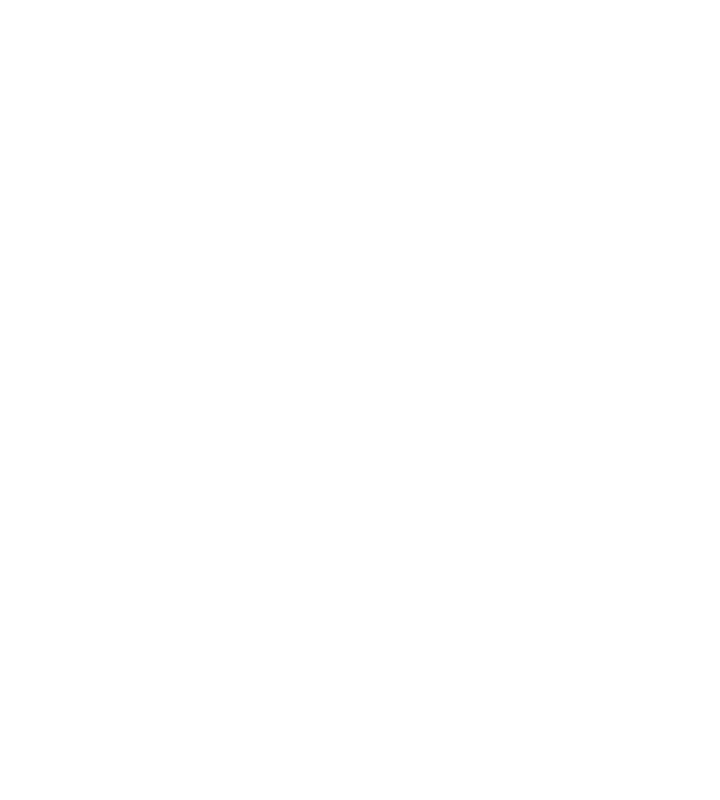

NameError: name 'sklearn_out' is not defined

<IPython.core.display.Javascript object>


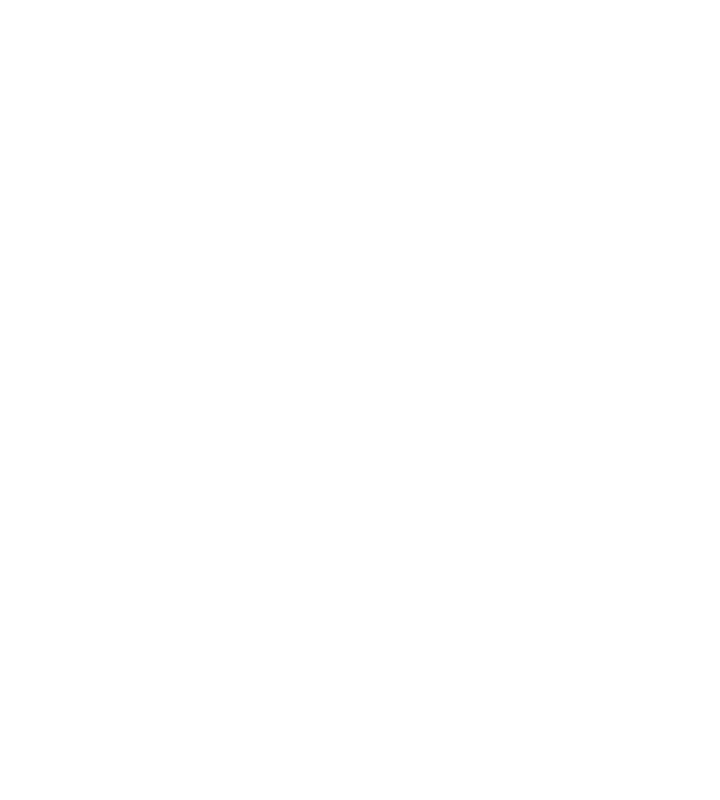

In [256]:
f0 = figure(num = 0, figsize = (9, 10))#, dpi = 100)
ax01 = f0.add_subplot(1,1,1)
ax01.grid('on')
ax01.set_ylim(-10,5)
ax01.set_xlim(0,600)
ax.set_xticks([0,100,200,300,400,500,600])
ax01.set_xlabel("Simulation time (ns)")
ax01.set_ylabel(r'$SVM_{cv}$')


all_tic_0 = np.arange(len(sklearn_out))
all_tic_1 = sklearn_out
tic0=np.zeros(0)
tic1=np.zeros(0)
t=np.zeros(0)

ax01.plot(sklearn_out,c=sns.color_palette("deep")[2],alpha=0.3,label="Walker 25 (of 25)")
ax01.legend(loc='lower right')
p014, = ax01.plot(tic0,tic1, marker='o',c=sns.color_palette("deep")[2])

ax01.set_xticklabels([0,5,10,15,20,25,30])

def updateData(i):
    print(i)

    frm_pt = max(0, i-100)
    p014.set_data(all_tic_0[frm_pt:i], all_tic_1[frm_pt:i])
    return p014,

print(len(all_tic_0))

f0.tight_layout()
simulation = animation.FuncAnimation(f0, updateData, np.arange(len(100)),
    blit=False, interval=5,repeat=False)
simulation.save(filename='t2_t.mp4',fps=25,dpi=100,bitrate=5000)

